# Give me some credit

In [1]:
import time
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# params
seed = 42

## 1. Подгрузка данных

Источник - [соревнование на kaggle](http://www.kaggle.com/c/GiveMeSomeCredit)

*A small credit card dataset for simple econometric analysis*

Странная целевая переменная: *card: Dummy variable, 1 if application for credit card accepted, 0 if not*. Отсюда и доля целевых событий в 77%.

Показатели из других работ:

| Paper | ACC | AUC | Gini |
| --- | --- | --- | --- | 
| Engelmann & Lessmann, 2021 | - | 0.8415 | 0.6830 | 
| Melo Junior et al., 2020 | 0.65 | 0.77  |0.5400 |  
| Tsai et al., 2021 | - | 0.850 | 0.7000 | 




In [5]:
df = pd.read_csv("AER_credit_card_data.csv")

df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


## 2. Анализ факторов

Круто, что нет скрытых пропусков среди значений признаков!

**card**: Dummy variable, 1 if application for credit card accepted, 0 if not

**reports**: Number of major derogatory reports

**age**: Age n years plus twelfths of a year

**income**: Yearly income (divided by 10,000)

**share**: Ratio of monthly credit card expenditure to yearly income

**expenditure**: Average monthly credit card expenditure

**owner**: 1 if owns their home, 0 if rent

**selfempl**: 1 if self employed, 0 if not.

**dependents**: 1 + number of dependents

**months**: Months living at current address

**majorcards**: Number of major credit cards held

**active**: Number of active credit accounts

😜😜😜

Notes:
According to Greene (2003, p. 952) dependents equals 1 + number of dependents.
That is described above. The authors of the "AER" package in R believe it is the number of dependents.
The correct definition is unresolved at this time ¯_(ツ)_/¯

In [12]:
X = df.loc[:, df.columns != 'card']
y = df['card'].map({'yes' : 1, 'no' : 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Save data & info ===
# parquet is optimized for large volumes of data
!mkdir samples
X_train.to_parquet('./samples/X_train.parquet')
X_test.to_parquet('./samples/X_test.parquet')
# переводим pd.Series в pd.DataFrame для удобного экспорта
pd.DataFrame(y_train).to_parquet('./samples/y_train.parquet')
pd.DataFrame(y_test).to_parquet('./samples/y_test.parquet')

# сохраняем списки категориальных и колич. переменных
cat_vals = ['owner', 'selfemp']
num_vals = ['reports', 'age', 'income', 'share', 
            'expenditure', 'dependents', 'months',
            'majorcards', 'active']

with open('factors.json', 'w') as f:
    json.dump({'cat_vals': cat_vals, "num_vals": num_vals}, f)

�������� ��� 䠩� samples 㦥 �������.


## 3. Статистики и пропуски

### Статистики

In [15]:
print(f'Количество наблюдений: {X.shape[0]}')
print(f'Количество факторов: {X.shape[1]}')
print(f'Количество целевых событий: {y.sum()}')
print(f'Доля целевых событий: {y.sum() / X.shape[0] * 100}%')

Количество наблюдений: 1319
Количество факторов: 11
Количество целевых событий: 1023
Доля целевых событий: 77.5587566338135%


### Пропуски

Пропуски в датасете отсутствуют:

In [16]:
X.columns.isna().sum()

0

## 4. Визуальный анализ и выбросы

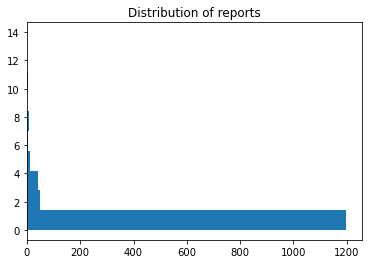

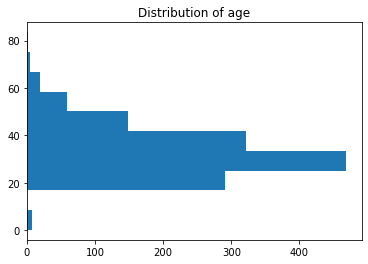

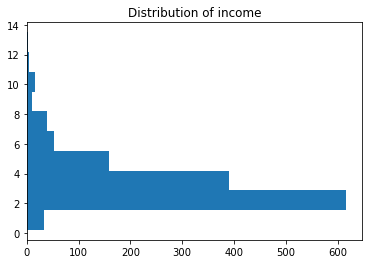

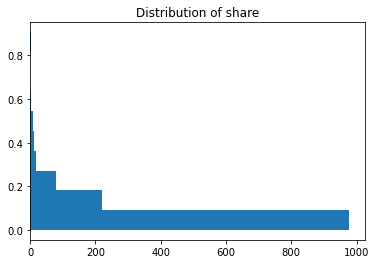

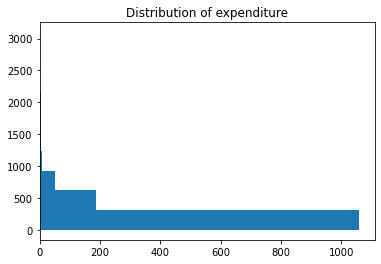

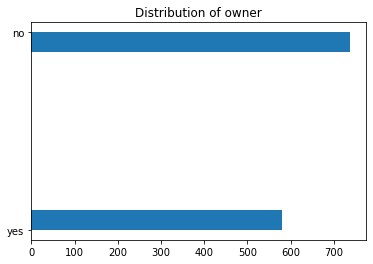

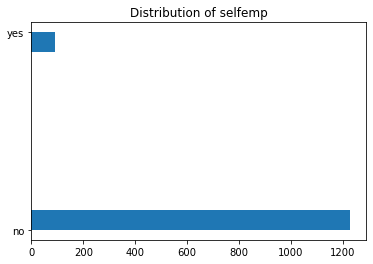

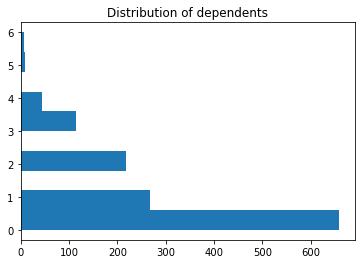

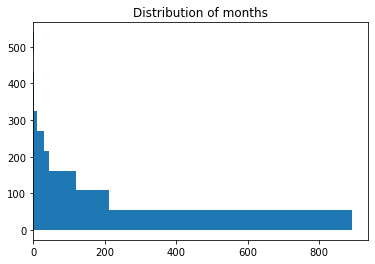

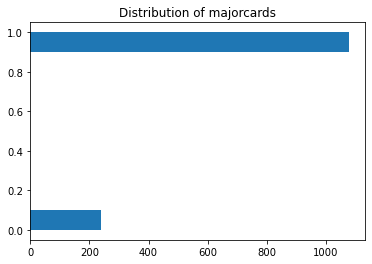

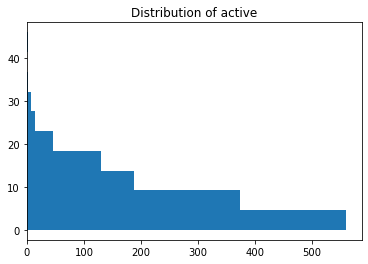

In [18]:
for col in X.columns:
    plt.hist(X[col], orientation='horizontal')
    plt.title(f'Distribution of {col}')
    plt.show()

### Выводы 

Приятный датасет в смысле предобработки, однако непонятно зачем он нужен. Предсказывать решение банка по выдаче кк ? :)